In [58]:
import numpy as pd

In [59]:
import pandas as pd

# How is a person’s self-reported level of anxiety and depression affected by the tempo of the music they listen to?

In [60]:
pd.read_csv("./../data/raw/mxmh_survey_results.csv")

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


I really have three variables present in my research question: 1. Anxiety, 2. Depression, and 3. Tempo. I will likely have to remove many of the columns as they will not be relevant. Also, while I did not see many null data points, there were still a few and I need to remove those. As far as visualizations go, I am not very familiar with the capabilities of the software we will be using so I am not sure what I will have to work with.

- first data is exploratory, axniety levels affect by music -- yes or not
- second layer, if yes than how does it affect, by spneidng more time, or other

<div align = 'center'><b> Potentially different questions? - Feedback said the original question was too vague </b></div>

- How are the frequency of listening to music genres, as well as ages of respondents, concentrated across different streaming services?
    - streaming services
    - Frequency of genre
    - Primary genre
    - Age
    
    Data could also be incorporated for more complex genres, bpm can be compared to genre to determine the style of music, for example trip hop, hardcore rap, etc.

- What kind of person listens to pop music?
    - Genre
    - frequency
    - composer
    - instrumentalist
    - age 
    - streaming service
    - foreign language
    - anxiety
    - ocd
    - insomnia

- Which genres of music are listened to during work?
- How is bpm distributed accross genres, or which kind of music listeners listen to high bpm music?
- How do genres of music use bpm?
- Mental health differences across genres/bpm
- How does participants age affect genre or streaming service selection?

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

df = pd.read_csv("./../data/raw/mxmh_survey_results.csv")

df.shape
df.head()
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [2]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,629.000000,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1589948.344992,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,39872606.180372,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,999999999.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
df_cleaned = df[["Fav genre", "Age"]]


In [6]:
df_cleaned

,Fav genre,Age
0,Latin,18.0
1,Rock,63.0
2,Video game music,18.0
3,Jazz,61.0
4,R&B,18.0
...,...,...
731,Rock,17.0
732,Pop,18.0
733,Rap,19.0
734,Classical,19.0


In [7]:
df_cleaned.dropna()

,Fav genre,Age
0,Latin,18.0
1,Rock,63.0
2,Video game music,18.0
3,Jazz,61.0
4,R&B,18.0
...,...,...
731,Rock,17.0
732,Pop,18.0
733,Rap,19.0
734,Classical,19.0


In [8]:
df_cleaned = df_cleaned.dropna(axis=0)


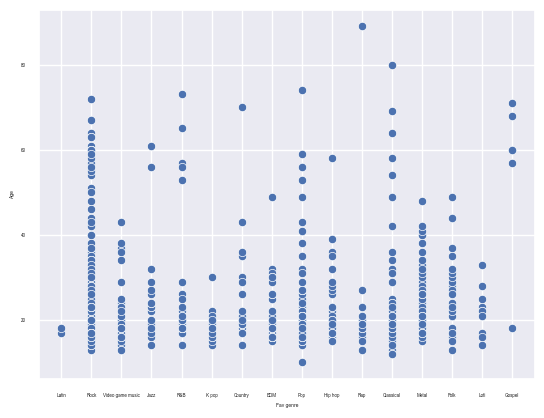

In [63]:
sns.scatterplot( x = "Fav genre", 
                 y = "Age", 
                 data = df_cleaned,)
sns.set(font_scale=2)


fig.set_size_inches(30, 6)


plt.show()

<AxesSubplot:xlabel='Fav genre', ylabel='Age'>

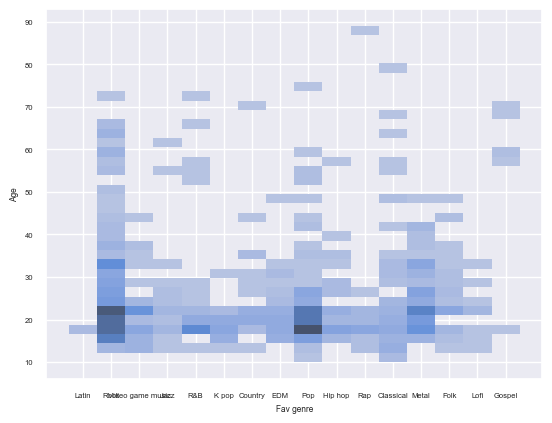

In [66]:
sns.set(font_scale=.5)
sns.histplot(y = "Age", x = "Fav genre", data = df_cleaned)


<AxesSubplot:xlabel='Fav genre', ylabel='Age'>

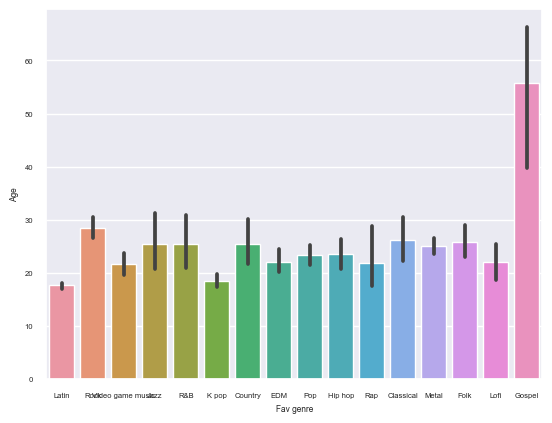

In [67]:
sns.barplot(x = "Fav genre", y = "Age", data = df_cleaned)

### Notes
- We can see that Gospel slants older
    - Not super surprising, I do not know any young people that listen to Gospel
- The most variety of listeners in age comes from Rock music
    - Makes sense as there are a lot of sub genres in Rock that span many decades (pop rock, punk, grunge, hair rock, etc.)
- High concentration of young listeners of pop music
- As well, while rock has older listeners than many other genres, there's a large concentration of young listeners
- Jazz, surprisingly, skews young
- K pop and Lo Fi, naturally, skew young
- Latin listeners are likely outliers
- R&B has a big young audience with some older listeners, likely from the 70s i.e. soul

# What kind of person listens to Pop music?
- I think the question: What kind of person listens to Pop music could be expanded upon with further research. Currently I do not have a great idea as to who listens to Pop as it is a pretty broad genre, but it would be interesting to explore what streaming service is used, this may indicate further explanations such as why Spotify spends more money on adding to their playlists, while Apple Music focuses on radio station, maybe this is because Spotify has more niche listeners while many mainstream, Pop listeners use Apple Music.
- This question could also be modified to fit other/more genres if necessary.
- To answer other questions that I proposed earlier I would need more data.